<a href="https://colab.research.google.com/github/yumnaehab-tech/data-science-projects/blob/main/classification/titanic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  

Missing values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Data after encoding:
    survived  pclass   age  sibsp  parch     fare  adult_male  sex_male  \
0         0       3  22.0      1      0  

/tmp/ipython-input-3262171401.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["age"].fillna(data["age"].median(), inplace=True)
/tmp/ipython-input-3262171401.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

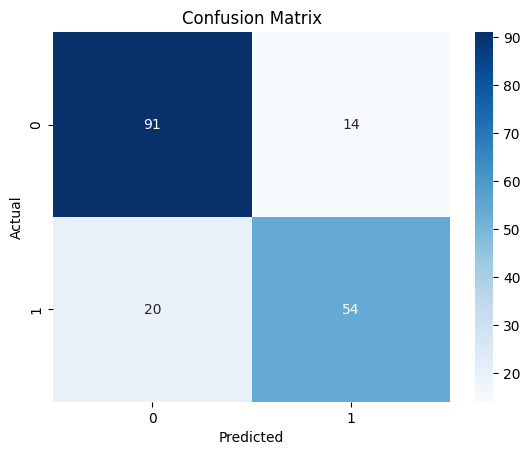


The model performed decently. Most important features seem to be gender and passenger class.
Next step: try feature scaling or Random Forest to see if accuracy improves.


In [ ]:

# Titanic Survival Prediction
# Created by Yumna Ehab

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ML Tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#  Load and explore data
# Using Seaborn's Titanic dataset
data = sns.load_dataset("titanic")
print("Dataset shape:", data.shape)
print(data.head(3))  # just to check first few rows

# Handle missing values
# Check how many missing values we have
print("\nMissing values:\n", data.isnull().sum())

# I'll fill missing ages with the median
data["age"].fillna(data["age"].median(), inplace=True)

# Embarked (port) fill missing with the most common one
data["embarked"].fillna(data["embarked"].mode()[0], inplace=True)

# Drop useless columns for now
data.drop(["deck", "embark_town", "alive"], axis=1, inplace=True)

#  Convert categorical features
# Turn text categories into numbers
data = pd.get_dummies(data, columns=["sex", "embarked", "class", "who", "alone"], drop_first=True)

print("\nData after encoding:\n", data.head(2))

#  Define features and target
X = data.drop("survived", axis=1)
y = data["survived"]

#  Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train the model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

#  Make predictions and evaluate
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("\nModel accuracy:", round(acc*100, 2), "%")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  Quick look at confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Final Notes
print("\nThe model performed decently. Most important features seem to be gender and passenger class.")
print("Next step: try feature scaling or Random Forest to see if accuracy improves.")


###  Project Summary

This project analyzes the Titanic dataset to predict passenger survival using classification algorithms.  
Through data cleaning, encoding categorical features, and model evaluation, the model achieved **81.01% accuracy**.  

###  Future Improvements
- Try different models like Random Forest or XGBoost for comparison.  
- Perform feature engineering to add new insights (e.g., family size, title extraction).  
- Tune hyperparameters to improve model performance.  
- Visualize feature importance to understand what influences survival most.
